## Computing Cross Sections for a Grid of Pressures and Temperatures

Often, a user will want to compute a cross section at multiple pressure and temperatures. In this tutorial, we demonstrate how to do just that, along with plotting all the cross sections on the same graph. We assume the user has read the [Quick Start](https://excalibur-alpha.readthedocs.io/en/latest/content/notebooks/quick_start.html) tutorial already. 


### Pressure Grid

To compute the cross section for a grid, simply enter an array instead of an integer for either the pressure, temperature, or both. Everything else remains the same. In this section, we'll compute over a grid of pressures, and in the next section we'll compute over a grid of temperatures.

In [1]:
from excalibur.core import summon, compute_cross_section

species = 'CO'
database = 'ExoMol'

# Download line list
summon(database=database, species = species)

P = [0.01, 0.1, 1]  # Pressure in bars
T = [1000]  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists

# Calculate the cross section
compute_cross_section(species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P)


 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 12C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
This file is already downloaded. Moving on.
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...

This file is already downloaded. Moving on.

This file is already downloaded. Moving on.

Line list ready.

Beginning cross-section computations...
Loading ExoMol format
Loading partition function


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Pre-computing Voigt profiles...
Voigt profiles computed in 6.552500291999998 s
Pre-computation steps complete
Generating cross section for CO at P = 0.01 bar, T = 1000 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 4.275315792000001 s
Computing transitions from E2.h5 | 50.0% complete
Completed 6474 transitions in 0.1364971670000017 s
Calculation complete!
Completed 131970 transitions in 4.479232124999996 s

Pre-computing Voigt profiles...
Voigt profiles computed in 5.643948834 s
Pre-computation steps complete
Generating cross section for CO at P = 0.1 bar, T = 1000 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 3.659818915999992 s
Computing transitions from E2.h5 | 50.0% complete
Completed 6474 transitions in 0.08329125000000204 s
Calculation complete!
Completed 131970 transitions in 3.754616250000012 s

Pre-computing Voigt profiles...
Voigt profiles computed in 5.339732040999991 s
Pre-computation steps com

Next, we need to parse the cross section files and extract the cross section data. As usual, we first import the relevant functions from `excalibur.plot`.

Then, we create an empty array called `cross_sections` that will contain all of our cross sections. We add the first cross section to this empty collection of cross sections. This is done by calling the `cross_section_collection` function with the data of the new cross section (`nu` and `sigma`) along with the `cross sections` parameter. We call this statement a second and third time to add the other temperature-pressure combinations to the collection as well. By passing in the `collection = cross_sections` parameter every time, we ensure that all of our cross sections are added to the same collection, to make the plotting easier in the next part.

In [3]:
from excalibur.plot import read_cross_section_file, cross_section_collection

'''Read in the 3 cross sections we just computed'''

nu, sigma  = read_cross_section_file(species = species, database = database, filename = 'CO_T1000K_log_P-2.0_H2-He_sigma.txt')
nu2, sigma2  = read_cross_section_file(species = species, database = database, filename = 'CO_T1000K_log_P-1.0_H2-He_sigma.txt')
nu3, sigma3  = read_cross_section_file(species = species, database = database, filename = 'CO_T1000K_log_P0.0_H2-He_sigma.txt')

'''Add cross sections to collection in preparation for plotting'''

cross_sections = []

# Add first cross section to collection
cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)

# Add second cross section to collection, making sure to specify the previous collection as a parameter
cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections)

# Add third cross section to collection
cross_sections = cross_section_collection(new_x = nu3, new_y = sigma3, collection = cross_sections)



Plotting complete.


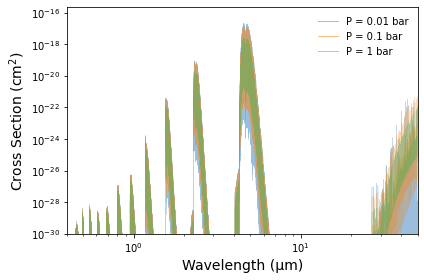

In [4]:
from excalibur.plot import plot_cross_section

'''Plot all 3 cross sections on the same plot'''

plot_cross_section(collection = cross_sections, labels = ['P = 0.01 bar', 'P = 0.1 bar', 'P = 1 bar'], filename = 'CO_Cross_Section_at_Diff_Pressures')


### Temperature Grid

Now we do the same process, but instead of varying the pressure, we vary the temperature. Since there is only one parameter that changes (`T`), we leave the code below with no intermediary comments, so that the user can see all of Excalibur in action at once. For clarity, we will redefine parameters and reimport functions.


 ***** Downloading requested data from ExoMol. You have chosen the following parameters: ***** 

Molecule: CO 
Isotopologue: 12C-16O 
Line List: Li2015

Starting by downloading the .broad, .pf, and .states files...
This file is already downloaded. Moving on.
Fetched the broadening coefficients, partition functions, and energy levels.
Now downloading the Li2015 line list...

This file is already downloaded. Moving on.

This file is already downloaded. Moving on.

Line list ready.

Beginning cross-section computations...
Loading ExoMol format
Loading partition function
Pre-computing Voigt profiles...
Voigt profiles computed in 5.223321249999998 s
Pre-computation steps complete
Generating cross section for CO at P = 1 bar, T = 1000.0 K
Computing transitions from Li2015.h5 | 0.0% complete
Completed 125496 transitions in 3.552894750000007 s
Computing transitions from E2.h5 | 50.0% complete
Completed 6474 transitions in 0.11643374999999878 s
Calculation complete!
Completed 131970 transition

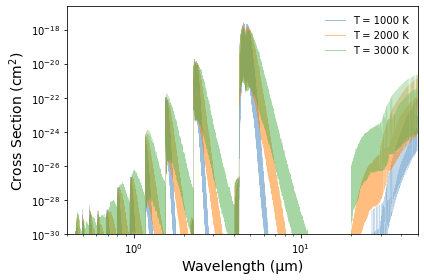

In [5]:
from excalibur.core import summon, compute_cross_section
from excalibur.plot import read_cross_section_file, cross_section_collection, plot_cross_section

species = 'CO'
database = 'ExoMol'

'''Download line list'''

summon(database=database, species = species)

'''Compute cross section'''

P = [1]  # Pressure in bars
T = [1000, 2000, 3000]  # Temperature in Kelvin
input_directory = './input/' # Top level directory containing line lists

compute_cross_section(species = species, database = database, temperature = T, input_dir = input_directory, 
                      pressure = P)


'''Read in the 3 cross sections we just computed'''

nu, sigma  = read_cross_section_file(species = species, database = database, filename = 'CO_T1000.0K_log_P0.0_H2-He_sigma.txt')
nu2, sigma2  = read_cross_section_file(species = species, database = database, filename = 'CO_T2000.0K_log_P0.0_H2-He_sigma.txt')
nu3, sigma3  = read_cross_section_file(species = species, database = database, filename = 'CO_T3000.0K_log_P0.0_H2-He_sigma.txt')

'''Add cross sections to collection in preparation for plotting'''

cross_sections = []

# Add first cross section to collection
cross_sections = cross_section_collection(new_x = nu, new_y = sigma, collection = cross_sections)

# Add second cross section to collection, making sure to specify the previous collection as a parameter
cross_sections = cross_section_collection(new_x = nu2, new_y = sigma2, collection = cross_sections)

# Add third cross section to collection
cross_sections = cross_section_collection(new_x = nu3, new_y = sigma3, collection = cross_sections)

'''Plot all 3 cross sections on the same plot'''

plot_cross_section(collection = cross_sections, labels = ['T = 1000 K', 'T = 2000 K', 'T = 3000 K'], filename = 'CO_Cross_Section_at_Diff_Temperatures')


### Explanation of what we're seeing in temp. and pres. plots - Ryan to write